In [6]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import auc_score

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#get data

movielens = fetch_movielens()

movie_train, movie_test = movielens['train'], movielens['test']


In [17]:
#train models

alpha = 1e-05
epochs = 30
num_components = 30

movie_model = LightFM(no_components=num_components,
                    loss='warp',
                    learning_schedule='adagrad',
                    max_sampled=100,
                    user_alpha=alpha,
                    item_alpha=alpha,
                    learning_rate = 0.01)


In [18]:
# fitting model and testing

movie_auc = []

for epoch in range(epochs):
    movie_model.fit_partial(movie_train, epochs=1)
    movie_auc.append(auc_score(movie_model, movie_test, train_interactions=movie_train).mean())
    
    

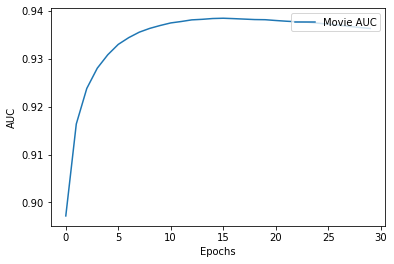

In [25]:
#graph

x = np.arange(epochs)

plt.plot(x, np.array(movie_auc))
plt.xlabel('Epochs')
plt.ylabel('AUC')

plt.legend(['Movie AUC'], loc = 'upper right')


plt.savefig('Hybrid_Model_Movie.png', facecolor = 'w')